# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string


# Importing Data Set 

In [2]:
df_true= pd.read_csv('True.csv')

df_fake= pd.read_csv('Fake.csv')


In [3]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17


In [4]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17


In [5]:
df_fake.shape

(3089, 4)

In [6]:
df_true.shape

(3307, 4)

## Inserting a column "class" as target feature

In [7]:
df_fake["class"] = 0
df_true["class"] = 1

In [8]:
df_fake.shape, df_true.shape

((3089, 5), (3307, 5))

In [9]:
# Removing last 10 rows for manual testing

df_fake_manual_testing = df_fake.tail(10)

for i in range(3088,3078,-1):
    df_fake.drop([i], axis = 0, inplace = True)
    
    
df_true_manual_testing = df_true.tail(10)
for i in range(3306,3296,-1):
    df_true.drop([i], axis = 0, inplace = True)

In [10]:
df_fake.shape, df_true.shape

((3079, 5), (3297, 5))

In [11]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

C:\Users\SHILPI~1\AppData\Local\Temp/ipykernel_5380/860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\SHILPI~1\AppData\Local\Temp/ipykernel_5380/860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


In [12]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
3079,Stephen King OBLITERATES Trump For Throwing A...,Donald Trump disgusted thousands of Americans ...,News,10-Jan-17,0
3080,Republicans BETRAY Paul Ryan And Mitch McConn...,Many Republicans in Congressional leadership a...,News,10-Jan-17,0
3081,Facebook Troll EXCITED For Obamacare Repeal I...,It what can only be seen as a situation where ...,News,9-Jan-17,0
3082,Mitch McConnell Just Got BEAT DOWN With His O...,Donald Trump has chosen the worst of the worst...,News,9-Jan-17,0
3083,Trump’s America: Jewish Centers Rattled With ...,"In Trump s new America, hate and violence are ...",News,9-Jan-17,0
3084,Trump Team Getting Approval On White National...,There s a man who s been permanently banned fr...,News,9-Jan-17,0
3085,Trump Just Told His Most INSANE Inauguration ...,President-elect Donald Trump is currently tryi...,News,9-Jan-17,0
3086,Kellyanne Conway Announces Trump’s HUGE ‘Than...,Kellyanne Conway accidentally announced exactl...,News,9-Jan-17,0
3087,Ron Howard’s Defense Of Meryl Streep To A Twi...,"By now you have seen, or at least heard about ...",News,9-Jan-17,0
3088,Auto Company HUMILIATES Trump For Bragging Th...,Donald Trump tried to take credit for Fiat Chr...,News,9-Jan-17,0


In [13]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
3297,Comey says Trump fired him to undermine FBI Ru...,WASHINGTON (Reuters) - Former FBI Director Jam...,politicsNews,8-Jun-17,1
3298,Trump lawyer criticizes Comey's leak to news m...,(Reuters) - Former FBI Director James Comey sa...,politicsNews,9-Jun-17,1
3299,"Trump still standing, but damaged by Comey's t...",WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,9-Jun-17,1
3300,"Trump attorney disputes Comey testimony, slams...",WASHINGTON (Reuters) - President Donald Trump’...,politicsNews,8-Jun-17,1
3301,Former FBI chief's ire over Trump laid bare in...,WASHINGTON (Reuters) - Throughout the drama of...,politicsNews,8-Jun-17,1
3302,"Trump, as Comey takes spotlight, vows to stay ...",WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,8-Jun-17,1
3303,Republicans take knife to post-crisis Wall Str...,WASHINGTON (Reuters) - Republicans in the U.S....,politicsNews,8-Jun-17,1
3304,Trump chooses fundraiser Scaramucci for ambass...,"WASHINGTON (Reuters) - Anthony Scaramucci, a R...",politicsNews,8-Jun-17,1
3305,Q&A: What we know about U.S. probes of Russian...,(Reuters) - Former FBI Director James Comey te...,politicsNews,8-Jun-17,1
3306,Trump voter fraud official announces bid for K...,(Reuters) - Kansas Secretary of State Kris Kob...,politicsNews,8-Jun-17,1


In [14]:
# Again merging those removed rows to the csv so that we dont change the main csv file
df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
df_manual_testing.to_csv("manual_testing.csv")

 ## Merging True and Fake Dataframes

In [15]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,31-Dec-17,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,31-Dec-17,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,30-Dec-17,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,29-Dec-17,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,25-Dec-17,0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,25-Dec-17,0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,23-Dec-17,0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,23-Dec-17,0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,22-Dec-17,0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,21-Dec-17,0


##### 

In [16]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

### Removing columns which are not required

In [17]:
df = df_merge.drop(["title", "subject","date"], axis = 1)

In [18]:
df.isnull().sum()

text     0
class    0
dtype: int64

### Random Shuffling the dataframe

In [19]:
#Use pandas.DataFrame.sample(frac=1) method to shuffle the order of rows. 
#The frac keyword argument specifies the fraction of rows to return in the random sample DataFrame.
df = df.sample(frac = 1)

In [20]:
df.head()

,text,class
3002,(Reuters) - President Donald Trump’s son-in-la...,1
2993,Trump s war on the media didn t end with his e...,0
1281,WASHINGTON (Reuters) - President Donald Trump ...,1
3273,WASHINGTON (Reuters) - A group of Republican l...,1
629,WASHINGTON (Reuters) - The Republican-controll...,1


In [21]:
# dropping the index as it is shuffled now or else it will create problem in future
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [22]:
df.columns

Index(['text', 'class'], dtype='object')

In [23]:
df.head()

,text,class
0,(Reuters) - President Donald Trump’s son-in-la...,1
1,Trump s war on the media didn t end with his e...,0
2,WASHINGTON (Reuters) - President Donald Trump ...,1
3,WASHINGTON (Reuters) - A group of Republican l...,1
4,WASHINGTON (Reuters) - The Republican-controll...,1


## Creating a function to process the texts

In [24]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [25]:
df["text"] = df["text"].apply(wordopt)

## Defining dependent and independent variables

In [26]:
x = df["text"]
y = df["class"]

## Plotting Data

C:\Users\Shilpi Singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_count'>

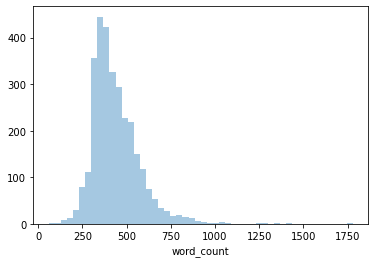

In [27]:
df['word_count'] = [len(s.split()) for s in df['text']]
#real 
sns.distplot(df['word_count'][df['class'] == 0], kde=False, rug=False)


We can see from the above graph that most real news are within 1000 words, and the distribution of word count is skewed to the right.

<AxesSubplot:xlabel='word_count'>

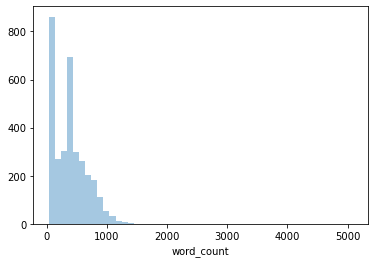

In [28]:
#fake 
sns.distplot(df['word_count'][df['class'] == 1], kde=False, rug=False)

As for the fake news, we see some outliers from above figure, making it hard to intepret, so we plot it again below with outlier (news that has more than 20,000 words) removed.

<AxesSubplot:xlabel='word_count'>

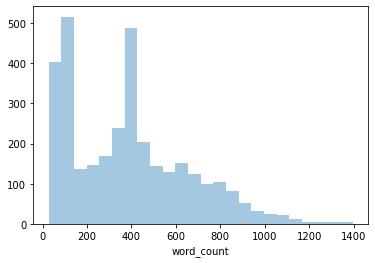

In [29]:
sns.distplot(df['word_count'][(df['class'] == 1) & (df['word_count'] < 1600)], kde=False, rug=False)

We can see the word count distribution of fake news are more skewed, most of the news have words below 500.

#### Word Cloud

Next we like to see what are the most common words in real/fake news to discover some patterns. Word cloud is a popular way to visualize it.

In [30]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [31]:
from wordcloud import WordCloud

def plot_wordcloud(target,width = 800, height = 400):
    """
    Plot wordcloud of real/fake news
    
    target: real/fake
    width: the width of plotted figure
    height: the height of plotted figure
    """
    if target == 'real':
        t = 0
    elif target == 'fake':
        t = 1
    text = ''
    for t in df['text'][df['class'] == t]:
        text = text + t
    wordcloud = WordCloud(max_font_size=40, min_font_size=20, width=800, height = 400, random_state=0).generate(text)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

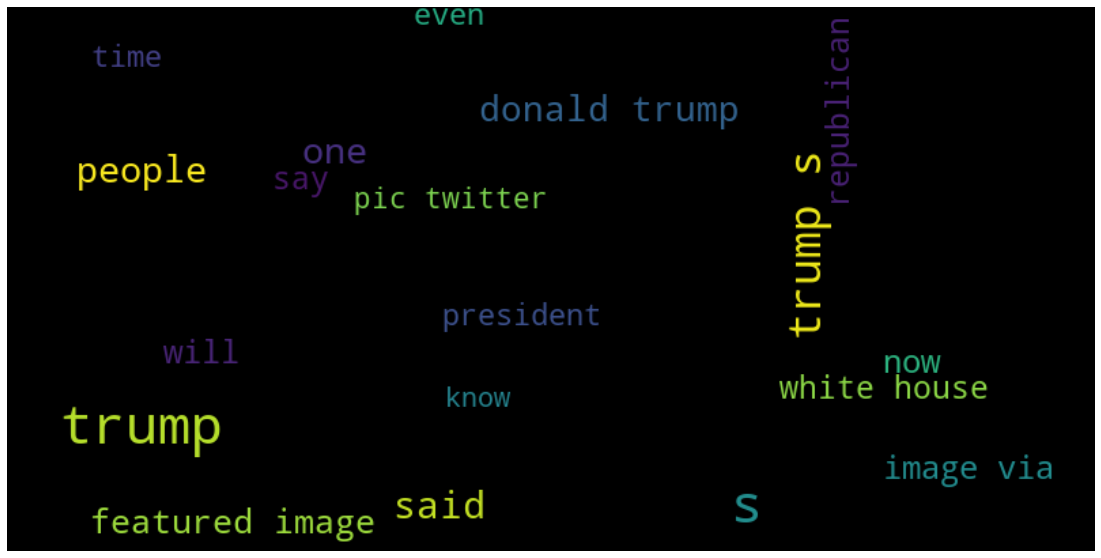

In [32]:
plot_wordcloud('real',width = 800, height = 400)

We can see most of the real news are about COVID19 virus, and the common words are countries name and some neutural words.

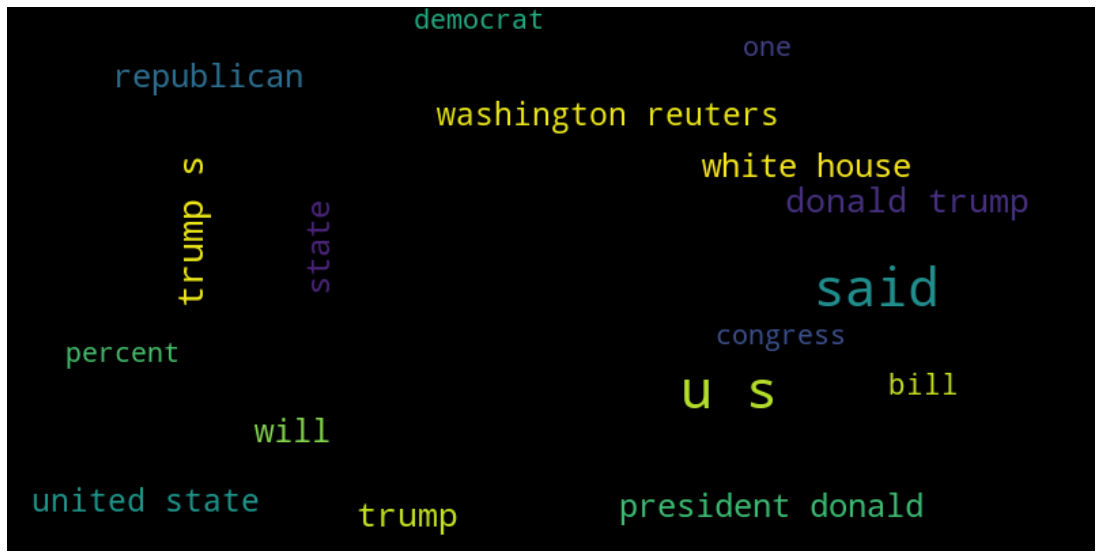

In [33]:
plot_wordcloud('fake',width = 800, height = 400)

## Splitting Training and Testing

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

## Convert text to vectors

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [37]:
pred_lr=LR.predict(xv_test)

In [38]:
LR.score(xv_test, y_test)

0.9893350062735258

In [39]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       760
           1       0.99      0.99      0.99       834

    accuracy                           0.99      1594
   macro avg       0.99      0.99      0.99      1594
weighted avg       0.99      0.99      0.99      1594



## Decision Tree Classification

In [40]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [41]:
pred_dt = DT.predict(xv_test)

In [42]:
DT.score(xv_test, y_test)

1.0

In [43]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       760
           1       1.00      1.00      1.00       834

    accuracy                           1.00      1594
   macro avg       1.00      1.00      1.00      1594
weighted avg       1.00      1.00      1.00      1594



## Gradient Boosting Classifier

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [45]:
pred_gbc = GBC.predict(xv_test)

In [46]:
GBC.score(xv_test, y_test)

1.0

In [47]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       760
           1       1.00      1.00      1.00       834

    accuracy                           1.00      1594
   macro avg       1.00      1.00      1.00      1594
weighted avg       1.00      1.00      1.00      1594



## Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)

RandomForestClassifier(random_state=0)

In [49]:
pred_rfc = RFC.predict(xv_test)

In [50]:
RFC.score(xv_test, y_test)

0.9943538268506901

In [51]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       760
           1       1.00      0.99      0.99       834

    accuracy                           0.99      1594
   macro avg       0.99      0.99      0.99      1594
weighted avg       0.99      0.99      0.99      1594



## Model Testing

In [52]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]),                                                                                                       output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [53]:
news = str(input())
manual_testing(news)

BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against  Taliban insurgents, saying:  Our troops will fight to win .  U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an   extraordinary sacrifice of blood and treasure .  We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they w

In [54]:
news = str(input())
manual_testing(news)

Vic Bishop Waking TimesOur reality is carefully constructed by powerful corporate, political and special interest sources in order to covertly sway public opinion. Blatant lies are often televised regarding terrorism, food, war, health, etc. They are fashioned to sway public opinion and condition viewers to accept what have become destructive societal norms.The practice of manipulating and controlling public opinion with distorted media messages has become so common that there is a whole industry formed around this. The entire role of this brainwashing industry is to figure out how to spin information to journalists, similar to the lobbying of government. It is never really clear just how much truth the journalists receive because the news industry has become complacent. The messages that it presents are shaped by corporate powers who often spend millions on advertising with the six conglomerates that own 90% of the media:General Electric (GE), News-Corp, Disney, Viacom, Time Warner, a

In [55]:
news = str(input())
manual_testing(news)

SAO PAULO (Reuters) - Cesar Mata Pires, the owner and co-founder of Brazilian engineering conglomerate OAS SA, one of the largest companies involved in Brazil s corruption scandal, died on Tuesday. He was 68. Mata Pires died of a heart attack while taking a morning walk in an upscale district of S o Paulo, where OAS is based, a person with direct knowledge of the matter said. Efforts to contact his family were unsuccessful. OAS declined to comment. The son of a wealthy cattle rancher in the northeastern state of Bahia, Mata Pires  links to politicians were central to the expansion of OAS, which became Brazil s No. 4 builder earlier this decade, people familiar with his career told Reuters last year. His big break came when he befriended Antonio Carlos Magalh es, a popular politician who was Bahia governor several times, and eventually married his daughter Tereza. Brazilians joked that OAS stood for  Obras Arranjadas pelo Sogro  - or  Work Arranged by the Father-In-Law.   After years of

In [56]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

# Train and evaluate each model, and store the accuracy scores in a dictionary
scores = {}
for model in models:
    model.fit(xv_train, y_train)
    y_pred = model.predict(xv_test)
    scores[type(model).__name__] = accuracy_score(y_test, y_pred)

# Print the accuracy scores for each model in descending order
sorted_scores = sorted(scores.items(), key=lambda x: x[1], reverse=True)
for model, score in sorted_scores:
    print(f'{model}: {score}')

GradientBoostingClassifier: 1.0
DecisionTreeClassifier: 0.9993726474278545
RandomForestClassifier: 0.9949811794228356
LogisticRegression: 0.9893350062735258
